In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Training/498R/Parkinson/pd_speech_features.csv")
df.sample(5)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
705,235,0,0.82938,0.66974,0.38675,414,413,0.004653,0.000055,0.00078,0.000004,0.00011,0.00029,0.00034,0.03072,0.266,0.01652,0.02040,0.02393,0.04955,0.991606,0.008477,21.187,77.942909,80.012103,79.136046,732.079239,1296.046035,3021.785802,3968.144738,135.358786,227.495091,52.234846,1099.076550,1.00000,5.5454,0.0000,1.31970,0.203600,0.19225,...,-0.025413,0.056535,0.316680,198.2757,24.7488,14.3003,8.1000,7.4550,7.2639,8.5864,5.0233,4.0028,4.1315,9.1092,3.0169,2.6246,2.6295,2.5150,1.9612,2.3427,1.6740,2.1542,1.5837,1.6363,1.7575,1.6258,1.6423,1.7019,9.1875,26.5542,8.6534,7.2700,4.3976,2.7659,2.2660,2.5555,2.7540,2.6839,3.9689,0
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,0.000017,0.00034,0.00088,0.00103,0.06300,0.539,0.02949,0.04091,0.06445,0.08848,0.987625,0.012621,20.302,75.097654,78.465346,76.841929,668.306515,1165.769341,2954.648489,3560.280084,128.235259,91.930442,238.244533,959.282262,1.00000,9.1775,0.0000,0.83430,0.077763,0.16189,...,-0.848520,-0.474480,0.088408,13.2574,9.6454,7.2754,5.8891,5.5500,4.8010,4.3778,3.9601,3.2498,3.2244,4.5820,2.7862,2.2954,2.4363,2.3275,2.0011,1.9032,2.1827,3.1184,2.7436,1.7994,1.6115,1.6696,3.2216,1.5822,1.5563,1.5800,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
555,185,1,0.82167,0.71228,0.47668,272,271,0.007091,0.000055,0.00128,0.000009,0.00030,0.00064,0.00089,0.04867,0.424,0.02528,0.02924,0.04218,0.07583,0.980504,0.020439,19.238,75.675497,80.510314,78.523169,648.590075,1096.611034,2223.648000,3134.352125,132.606811,83.030861,213.318535,443.667405,0.82005,9.6045,2.2322,0.82639,0.137310,0.13917,...,-0.292900,-0.556600,0.474900,13.3485,17.4268,9.4156,7.3612,7.5377,8.1537,5.6502,5.5295,5.8898,6.1115,4.2417,5.3473,2.8035,3.0151,3.1114,2.7013,2.8667,2.7623,2.7036,2.3905,2.2974,1.9204,1.7640,1.9943,1.8251,1.8085,1.8046,1.9412,29.7967,18.5182,10.2037,13.9892,24.0845,17.0437,11.9906,10.6872,1
604,201,0,0.80643,0.72731,0.59829,428,426,0.004500,0.000970,0.00132,0.000006,0.00029,0.00060,0.00088,0.07307,0.654,0.03863,0.04929,0.05543,0.11588,0.929599,0.082512,13.236,73.115908,76.758900,75.237575,870.810523,1476.020748,2432.941715,3685.758874,556.257189,421.813806,159.010920,310.052031,1.00000,7.9429,0.0000,1.06730,0.187210,0.15250,...,0.055437,-0.122170,-0.399380,909.0247,416.2626,413.8599,75.8602,17.6608,17.1839,75.5976,111.0077,19.1672,12.8896,54.5536,419.0948,34.4758,2.9312,2.4148,2.6240,3.6102,3.8064,2.9753,2.4292,3.4772,2.7632,2.3255,2.3732,2.2913,2.1668,2.1497,2.3503,3.8087,4.7022,4.8738,5.1649,2.8838,4.2563,4.6500,11.7712,1
212,70,0,

In [4]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [5]:
df.isnull().values.any()

False

In [6]:
df.isna().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [7]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.000000,756.000000,756.000000,756.000000,756.00000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,0.000605,0.001159,0.001815,0.067473,0.60642,0.034375,0.041175,0.055366,0.103125,0.961508,0.051131,18.859632,70.828609,76.135371,73.997008,647.174519,1233.852088,2562.425251,3547.259244,213.363237,297.174077,536.821070,506.604856,0.904423,32.295832,4.454840,1.092503,0.215038,0.144832,...,-0.041840,-0.015615,-0.005242,1059.146612,377.357439,328.927860,317.994439,305.036007,172.362746,40.408662,15.064513,12.107316,11.757945,11.871530,9.529080,3.741615,3.332313,3.270290,2.995472,2.710678,2.608229,2.553457,2.432001,2.300006,2.183111,2.176542,2.595250,6.782668,15.766942,21.026054,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,0.000981,0.001677,0.002942,0.042969,0.38257,0.022366,0.027165,0.033939,0.067097,0.064095,0.104579,5.576473,8.858268,6.446451,7.018006,134.957916,169.090402,393.315598,347.864299,306.976045,450.125488,754.341717,658.326606,0.147826,31.140746,7.313057,0.350789,0.132549,0.060065,...,1.431979,1.451535,4.448635,3522.528562,1514.808488,1338.602187,1275.228777,1211.296576,821.740615,239.548628,75.865176,77.370230,74.594974,39.125733,36.349168,4.821202,2.962967,2.049877,1.444227,1.310653,1.229086,1.061068,0.892523,0.868506,0.796446,1.709860,5.979131,31.707014,45.247304,43.716898,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,

In [8]:
df.corr()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,1.000000,-0.133605,0.026667,0.041938,-0.084606,0.085828,0.085226,-0.100831,-0.060464,-0.052865,-0.053242,-0.043118,-0.033177,-0.042941,-0.026528,-0.030966,-0.003872,-0.014963,-0.062943,-0.003883,-0.000844,0.013382,0.005422,0.001272,-0.041056,-0.027861,0.020222,0.183745,-0.027399,-0.040970,0.006928,0.056121,0.014227,0.011831,0.043525,-0.051898,-0.047075,-0.028496,-0.029086,-0.049264,...,0.029530,0.021700,0.023536,-0.039770,-0.019098,-0.021044,-0.034470,-0.062527,-0.038212,0.030588,0.008393,0.002324,-0.034003,-0.047758,-0.026516,0.021205,0.048809,0.031180,-0.009129,-0.017512,-0.027666,-0.015965,-0.049058,-0.017393,0.034967,0.028317,0.014667,0.000677,0.075756,0.053050,0.036897,0.016047,-0.023317,-0.045943,-0.041835,-0.053781,-0.058034,-0.057807,-0.055775,-0.111661
gender,-0.133605,1.000000,0.010175,0.099356,0.168321,-0.478367,-0.477710,0.460422,-0.110587,0.112004,0.147604,0.103713,0.132220,0.103607,0.049110,0.045108,0.042358,0.021262,0.070699,0.042361,-0.052420,0.049660,-0.102439,-0.036851,0.020527,0.015253,-0.519415,-0.487495,0.097458,-0.069628,-0.162028,-0.147007,-0.181002,0.047676,-0.096363,0.067785,0.007415,-0.185652,0.058348,-0.130788,...,-0.004349,0.000188,-0.017461,0.087143,0.060780,0.052639,0.039608,0.030366,0.002321,-0.059287,-0.000746,0.003781,-0.046313,-0.032178,0.079000,0.037589,-0.053820,-0.028764,0.073180,0.009664,0.020030,0.007581,0.150320,0.029382,-0.065918,-0.040040,-0.040027,-0.055503,-0.240361,-0.273543,-0.098689,0.000210,0.066091,0.083499,0.089793,0.107618,0.128936,0.107734,0.104828,0.182713
PPE,0.026667,0.010175,1.000000,-0.094775,-0.405558,0.191535,0.194098,-0.201907,-0.423660,-0.349053,-0.331009,-0.352693,-0.315749,-0.352547,-0.291379,-0.304997,-0.277071,-0.265907,-0.221549,-0.277074,0.343101,-0.322490,0.356035,0.198188,0.086053,0.112837,0.027940,0.009153,-0.021486,-0.004957,-0.052845,0.028994,0.008813,0.035277,0.276340,-0.313848,-0.385027,0.124969,-0.026172,0.027658,...,0.007413,0.012388,0.011800,-0.007339,-0.009811,-0.018240,-0.021187,-0.025908,-0.006875,0.016458,0.026299,0.028712,0.020360,-0.000354,0.013429,-0.004995,-0.050024,-0.067350,-0.089904,-0.106519,-0.069824,-0.056492,-0.031845,-0.026025,-0.129244,-0.054152,-0.038443,0.009439,0.087448,0.112430,0.144261,0.135544,0.091726,0.065035,0.044163,0.045755,0.046175,0.037385,0.039588,-0.072939
DFA,0.041938,0.099356,-0.094775,1.000000,0.155075,-0.286791,-0.286611,0.253708,0.084655,0.212120,0.201248,0.215512,0.229371,0.215378,0.285156,0.294626,0.301879,0.275767,0.208066,0.301883,-0.167906,0.142591,-0.301407,-0.289473,-0.304389,-0.31

In [9]:
x=df.iloc[:,:-1] #remove class atribute

In [10]:
x

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_33,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.265120,0.083127,...,-0.173620,0.071728,0.010352,-2.730300,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363615,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.220040,0.127410,...,0.684220,0.729330,0.780410,5.229400,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.157560,0.116890,...,-0.060885,0.269510,-0.005522,0.350540,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.172950,0.147370,...,-0.367170,0.366920,-0.492650,0.191640,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,

In [11]:
y=df.iloc[:,754] #set target column

In [12]:
y

0      1
1      1
2      1
3      1
4      1
      ..
751    0
752    0
753    0
754    0
755    0
Name: class, Length: 756, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
Rclf=RandomForestClassifier()  #create object

In [29]:
Rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [30]:
Rclf.score(xtest,ytest)

0.881578947368421

In [31]:
y_pred=Rclf.predict(xtest)

In [32]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

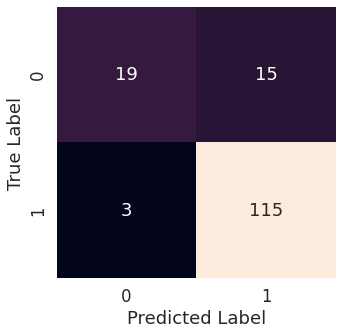

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_matrix(ytest,y_pred)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
Clf=DecisionTreeClassifier()

In [36]:
Clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [37]:
Clf.score(xtest,ytest)

0.7960526315789473

In [38]:
y_pred=Clf.predict(xtest)

In [39]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

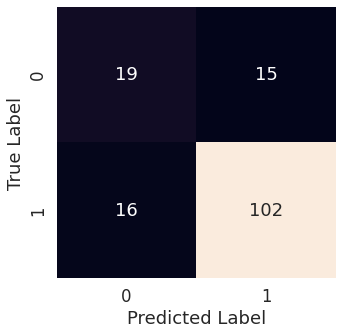

In [40]:
conf_matrix(ytest,y_pred)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [42]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [43]:
std = StandardScaler()
X_scaled = std.fit_transform(X)

In [44]:
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y)

In [45]:
lr_stock = LogisticRegression()
lr_stock.fit(X_train_s, y_train)

LogisticRegression()

In [46]:
lr_stock.score(X_test_s, y_test)

0.8201058201058201